<a href="https://colab.research.google.com/github/VeerendarGoud/ML-Projects/blob/master/hypothesis_testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom, norm
import matplotlib.pyplot as plt

Setup: T is the number of heads - test statistic

In [25]:
n, p = 10, 0.5

In [8]:
n = 10 # number of tosses
x_values = np.arange(0, n+1)
x_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
# 
binom.ppf(0.95, n, p)

8.0

In [24]:
binom.pmf(k=7, n=10, p=0.5)

0.11718749999999999

In [29]:
prob_getting_head = []

for i in range(1, 11):

    prob_head = binom.pmf(k=i, n=10, p=0.5)

In [31]:
n=6

In [32]:
survey_1 = [35,36, 33, 37, 34, 35]
survey_2 = [20, 37, 17, 50, 53, 33]

In [33]:
print(np.mean(survey_1))
print(np.mean(survey_2))

35.0
35.0


## Bootstrap sampling

In [34]:
bootstraped_samples = np.random.choice(survey_1, size=n)
np.mean(bootstraped_samples)

33.333333333333336

In [36]:
bootstraped_mean_samples_1 = []

for rep in range(10000):
    bootstraped_samples = np.random.choice(survey_1, size=n)
    bt_mean = np.mean(bootstraped_samples)
    bootstraped_mean_samples_1.append(bt_mean)



<AxesSubplot:ylabel='Count'>

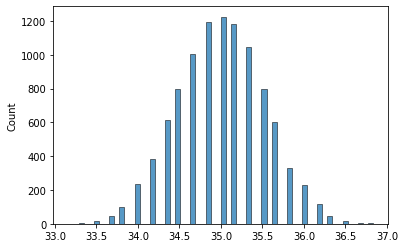

In [37]:
sns.histplot(bootstraped_mean_samples_1)

In [41]:
upper_1 = np.percentile(bootstraped_mean_samples_1, 97.5)
lower_1 = np.percentile(bootstraped_mean_samples_1, 2.5)

print(upper_1, lower_1)

36.0 34.0


In [39]:
bootstraped_mean_samples_2 = []

for rep in range(10000):
    bootstraped_samples = np.random.choice(survey_2, size=n)
    bt_mean = np.mean(bootstraped_samples)
    bootstraped_mean_samples_2.append(bt_mean)

<AxesSubplot:ylabel='Count'>

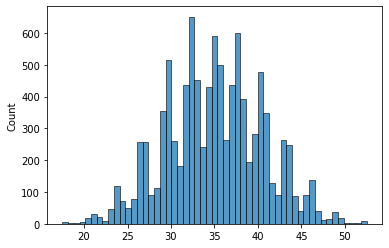

In [40]:
sns.histplot(bootstraped_mean_samples_2)

In [42]:
upper_2 = np.percentile(bootstraped_mean_samples_2, 97.5)
lower_2 = np.percentile(bootstraped_mean_samples_2, 2.5)

print(upper_2, lower_2)

46.0 24.0


In [48]:
1-norm.cdf(1849, loc=1800, scale=100/np.sqrt(50))

0.00026529005612552226

In [50]:
1-norm.cdf(1900, loc=1800, scale=100/np.sqrt(5))

0.0126736593387341

In [51]:
1-norm.cdf(3.53)

0.0002077798334806369

In [54]:
norm.ppf(0.99, loc=1800, scale=100/np.sqrt(50))

1832.8995271426638

In [55]:
norm.ppf(0.99, loc=1800, scale=100/np.sqrt(5))

1904.0374397133487

In [59]:
upper_limit = norm.ppf(0.975, loc=100, scale=15/np.sqrt(50))

104.15771147304903

In [60]:
lower_limit = norm.ppf(0.025, loc=100, scale=15/np.sqrt(50))

95.84228852695097

In [61]:
norm.ppf(0.025)

-1.9599639845400545

In [62]:
norm.ppf(0.975)

1.959963984540054

# Z test

In [20]:
from statsmodels.stats.weightstats import ztest

# Supply chain

In [65]:
df_team_1 = pd.read_csv("/content/team_1.csv")

In [66]:
df_team_1.head()

,sales
0,1853
1,1956
2,1837
3,1885
4,1755


In [67]:
df_team_1.mean()

sales    1850.02
dtype: float64

In [69]:
sales = df_team_1['sales']


H0 : mu = 1800

Ha : mu_s > 1800

In [70]:
#1. right tailed test
#2.  
ztest(sales, value = 1800, alternative='larger')

(4.099218918585183, 2.0727339284021037e-05)

In [ ]:
ztest(sales, value = 1800, alternative='larger')

In [71]:
z_stat = (sales.mean() - 1800 )/ (sales.std()/np.sqrt(len(sales)))

In [72]:
z_stat

4.099218918585183

In [73]:
1- norm.cdf(z_stat)

2.0727339284043467e-05

 #### - Reject the null hypothesis.  0.01 > 0.000207

# Drug Recovery

In [74]:
drug_1 = pd.read_csv("/content/drug_1_recovery.csv")
drug_2 = pd.read_csv("/content/drug_2_recovery.csv")

In [75]:
drug_1.size

100

In [76]:
drug_2.size

120

In [79]:
n1 = drug_1.size
mean_1 = drug_1.mean()
std_1 = drug_1.std()

n2 = drug_2.size
mean_2 = drug_2.mean()
std_2 = drug_2.std()

H0: mu_1 = mu_2 

Ha: mu_1 != mu_2

In [80]:
# two samples z - test
# two tailed test
ztest(drug_1, drug_2, value=0)

(array([-5.32112438]), array([1.03127863e-07]))

In [81]:
# two samples z - test
#  left tailed test
# mu1 < mu2
ztest(drug_1, drug_2, value=0, alternative='smaller')

(array([-5.32112438]), array([5.15639315e-08]))

Reject null hypothesis

In [82]:
# two samples z - test
#  right tailed test
# mu2 < mu1
ztest(drug_1, drug_2, value=0, alternative='larger')

(array([-5.32112438]), array([0.99999995]))

Failed to reject the null hypothesis or accept the null hypothesis mu_1 == mu_2

for right tailed we have very high p-vale we cannot accept alternative hypothesis

# Youtube Ad A/B testing

control group: same as before : 1 ad

treatment group: 2 ads

In [2]:
y_data = pd.read_csv("/content/youtube.csv")

In [3]:
y_data.sample(20)

,date,customer_id,premium,watch_time_hrs,customer_segmnt
6031,2018-05-09,686,0,4.523035,treatment
19547,2018-10-30,883,1,2.498919,treatment
10217,2018-02-16,761,0,1.590577,treatment
1024,2018-09-25,843,1,0.842017,treatment
17920,2018-01-03,94,0,6.971866,control
2670,2018-05-05,974,1,2.752988,treatment
4604,2018-04-13,164,0,1.809965,control
15720,2018-03-15,150,0,2.005404,control
19696,2018-12-20,546,0,2.579094,treatment
17001,2018-01-01,623,0,3.141679,treatment


In [4]:
y_data.shape

(20000, 5)

In [5]:
y_data['customer_segmnt'].value_counts()

control      10000
treatment    10000
Name: customer_segmnt, dtype: int64

In [7]:
y_data.describe()

,customer_id,premium,watch_time_hrs
count,20000.000000,20000.000000,20000.000000
mean,499.001650,0.176750,9.362542
std,288.223444,0.381467,244.884839
min,0.000000,0.000000,0.160268
25%,249.000000,0.000000,1.678066
50%,500.000000,0.000000,2.670953
75%,747.000000,0.000000,4.204673
max,999.000000,1.000000,10007.648185


In [9]:
q998 = y_data['watch_time_hrs'].quantile(0.998)

In [10]:
y_data = y_data[y_data['watch_time_hrs'] < q998]

In [11]:
y_data.shape

(19960, 5)

In [13]:
y_data.describe()

,customer_id,premium,watch_time_hrs
count,19960.000000,19960.000000,19960.000000
mean,499.160271,0.176653,3.331932
std,288.249181,0.381385,2.474943
min,0.000000,0.000000,0.160268
25%,249.000000,0.000000,1.676373
50%,501.000000,0.000000,2.664286
75%,747.000000,0.000000,4.186733
max,999.000000,1.000000,21.356119


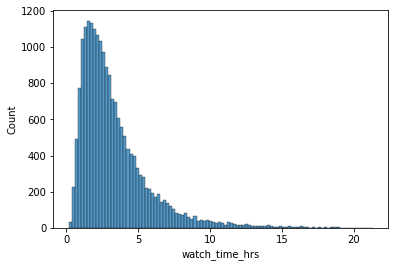

In [16]:
sns.histplot(y_data['watch_time_hrs'], bins=100)
plt.show()

In [17]:
control_data = y_data[y_data['customer_segmnt'] == "control"]
treatment_data = y_data[y_data['customer_segmnt']== "treatment"]

In [18]:
control_data['watch_time_hrs'].mean()

3.6099602285795678

In [19]:
treatment_data['watch_time_hrs'].mean()

3.0542936797350437

In [21]:
ztest(control_data['watch_time_hrs'], treatment_data['watch_time_hrs'])

(15.96034913022092, 2.4137738128170024e-57)

In [22]:
ztest(treatment_data['watch_time_hrs'], control_data['watch_time_hrs'])

(-15.96034913022092, 2.4137738128170024e-57)

In [24]:
ztest(control_data['watch_time_hrs'], treatment_data['watch_time_hrs'], alternative='larger')

(15.96034913022092, 1.2068869064085012e-57)

In [23]:
ztest(control_data['watch_time_hrs'], treatment_data['watch_time_hrs'], alternative='smaller')

(15.96034913022092, 1.0)